# Project 5

#### 3 people's emotion in different city before and after the game

In [69]:
# The emotion detector is trained by movie comments so will have some bias

In [1]:
import re
from textblob import TextBlob
def get_tweet_sentiment(tweet):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet['tweet']['text']))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 0
    elif analysis.sentiment.polarity == 0:
        return 1
    else:
        return 2
    
# clear all the annoying symbols
def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",'', tweet).split())

In [42]:
import json
import datetime, time
import pytz
import numpy as np

# Set time zone
pst_tz = pytz.timezone('US/Pacific')

# Hashtag names
hashtag_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
               'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

    
    
# Build a numpy array to store the features
# hours * (3 emotion types )
feature_shape = (600,3)

Seattle_emotion = np.zeros(feature_shape)
Boston_emotion = np.zeros(feature_shape)
    

# total number of tweets
Seattle_all = np.zeros((600,1))
Boston_all = np.zeros((600,1))

#----------------------------------------------------#

for hashtag_file in hashtag_names:
    
    # Find min_time and max_time
    all_times = []
    with open(hashtag_file) as f:      
        # Read line by line
        for line in f.readlines():          
            # Use json format
            tweet = json.loads(line)
            all_times.append(tweet['citation_date'])
        
        # Close the file
        f.close()
    
    min_time = min(all_times)
    max_time = max(all_times)
    
    # Get start and end timestamp
    start_time = datetime.datetime.fromtimestamp(min_time, pst_tz)
    end_time = datetime.datetime.fromtimestamp(max_time, pst_tz)
    # Truncate time to hour precision
    start_time = start_time.replace(minute=0, second=0, microsecond=0)
    end_time = end_time.replace(minute=0, second=0, microsecond=0)
    
    # Total number of hours
    total_hours = (end_time - start_time).days * 24 + (end_time - start_time).seconds // 3600

    
    # Open file
    with open(hashtag_file) as f:      
        # Read line by line
        for line in f.readlines():          
            # Use json format
            tweet = json.loads(line)
            # Get current time
            current_time = datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz)
            
            # Truncate time to hour precision
            current_time = current_time.replace(minute=0, second=0, microsecond=0)
            
            # Find hour number
            hour_num = (current_time - start_time).days * 24 + (current_time - start_time).seconds // 3600
            
            if tweet['tweet']['user']['location'] == 'Seattle':
                Seattle_all[hour_num] += 1
                Seattle_emotion[hour_num][get_tweet_sentiment(tweet)] += 1
                
            if tweet['tweet']['user']['location'] == 'Boston':
                Boston_all[hour_num] += 1
                Boston_emotion[hour_num][get_tweet_sentiment(tweet)] += 1

        # Close the file
        f.close()

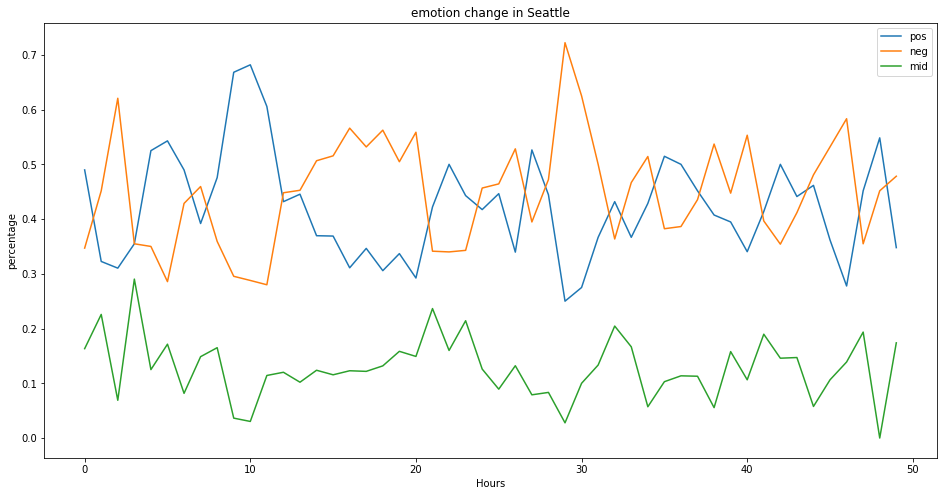

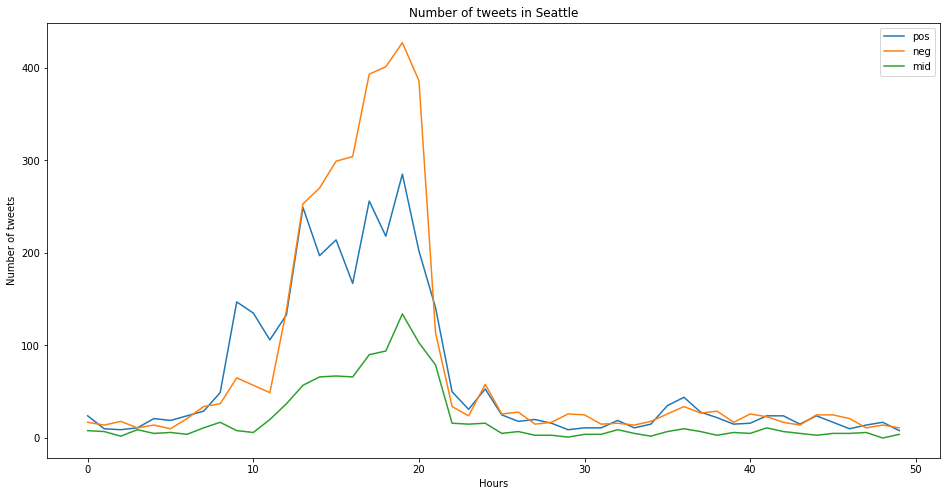

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

smoothed = medfilt(Seattle_emotion[430:480,:]/Seattle_all[430:480,:],1)

plt.figure(figsize=(16, 8))
plt.plot(smoothed)

plt.legend(['pos','neg','mid'])
plt.title(('emotion change in Seattle'))
plt.xlabel('Hours')
plt.ylabel('percentage')
plt.savefig('Figures/q3_seattle_percentage.png', format='png')
plt.show()


plt.figure(figsize=(16, 8))
plt.plot(Seattle_emotion[430:480,:])

plt.legend(['pos','neg','mid'])
plt.title(('Number of tweets in Seattle'))
plt.xlabel('Hours')
plt.ylabel('Number of tweets')
plt.savefig('Figures/q3_seattle.png', format='png')
plt.show()


/Users/shuangyu/ECE219_projects/.env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


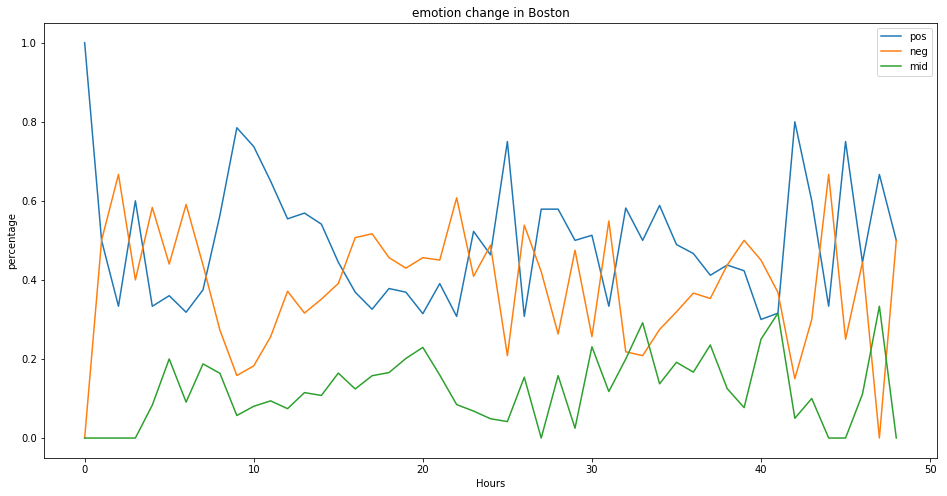

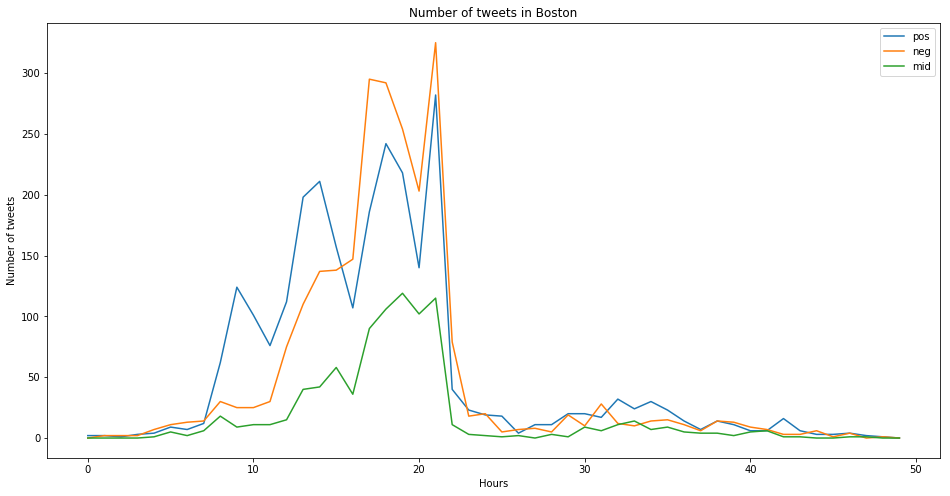

In [71]:
import numpy as np
import matplotlib.pyplot as plt


smoothed = medfilt(Boston_emotion[430:480,:]/Boston_all[430:480,:],1)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(smoothed)

plt.legend(['pos','neg','mid'])
plt.title(('emotion change in Boston'))
plt.xlabel('Hours')
plt.ylabel('percentage')
plt.savefig('Figures/q3_seattle.png', format='png')
plt.show()


plt.figure(figsize=(16, 8))
plt.plot(Boston_emotion[430:480,:])

plt.legend(['pos','neg','mid'])
plt.title(('Number of tweets in Boston'))
plt.xlabel('Hours')
plt.ylabel('Number of tweets')
plt.savefig('Figures/q3_seattle.png', format='png')
plt.show()

